In [15]:
from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun, Jupiter
from poliastro.twobody import Orbit
from astropy.time import Time

from poliastro.plotting import StaticOrbitPlotter

In [16]:
# Data from Curtis, example 4.3
r = [-6045, -3490, 2500] * u.km
v = [-3.457, 6.618, 2.533] * u.km / u.s

orb = Orbit.from_vectors(Earth, r, v)

In [17]:
orb

7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

In [18]:
orb.epoch.iso

'2000-01-01 12:00:00.000'

In [19]:
orb.get_frame()

<GCRS Frame (obstime=J2000.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s)>

frame = StaticOrbitPlotter()
frame.set_attractor(Earth)
frame.plot(orb)

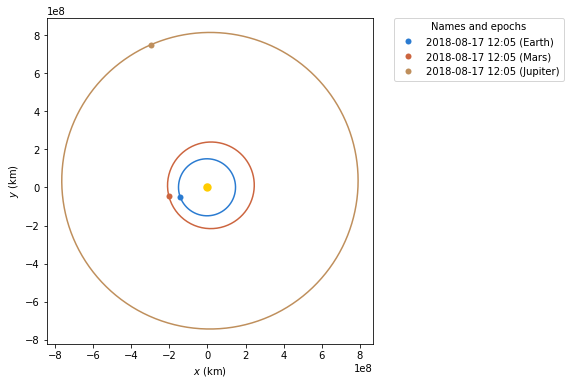

In [20]:
date_launch = Time("2018-08-17 12:05:50", scale="tdb")

plotter = StaticOrbitPlotter()
plotter.plot_body_orbit(Earth, date_launch, label="Earth")
plotter.plot_body_orbit(Mars, date_launch, label="Mars")
plotter.plot_body_orbit(Jupiter, date_launch, label="Jupiter");

## 1. Cowell's Formulation: Set Acceleration outwards of initial static orbit

In [21]:
import numpy as np
from astropy import units as u
from astropy import time

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.twobody.propagation import propagate
from poliastro.examples import iss

from poliastro.twobody.propagation import cowell
from poliastro.plotting import OrbitPlotter3D
from poliastro.plotting import OrbitPlotter2D
from poliastro.util import norm


import plotly.io as pio
pio.renderers.default = "notebook_connected"

Define acceleration of perturbation:

In [22]:
acc = 2e-5


def constant_acc_factory(acc):
    def constant_acc(t0, u, k):
        v = u[3:]
        norm_v = (v[0]**2 + v[1]**2 + v[2]**2)**.5
        return acc * v / norm_v

    return constant_acc

In [23]:
constant_acc_factory(acc)

<function __main__.constant_acc_factory.<locals>.constant_acc(t0, u, k)>

In [24]:
times = np.linspace(0, 10 * iss.period, 500)
times

<Quantity [    0.        ,   111.36211826,   222.72423652,   334.08635478,
             445.44847304,   556.8105913 ,   668.17270956,   779.53482782,
             890.89694608,  1002.25906434,  1113.6211826 ,  1224.98330086,
            1336.34541912,  1447.70753738,  1559.06965564,  1670.4317739 ,
            1781.79389216,  1893.15601042,  2004.51812868,  2115.88024694,
            2227.2423652 ,  2338.60448346,  2449.96660172,  2561.32871997,
            2672.69083823,  2784.05295649,  2895.41507475,  3006.77719301,
            3118.13931127,  3229.50142953,  3340.86354779,  3452.22566605,
            3563.58778431,  3674.94990257,  3786.31202083,  3897.67413909,
            4009.03625735,  4120.39837561,  4231.76049387,  4343.12261213,
            4454.48473039,  4565.84684865,  4677.20896691,  4788.57108517,
            4899.93320343,  5011.29532169,  5122.65743995,  5234.01955821,
            5345.38167647,  5456.74379473,  5568.10591299,  5679.46803125,
            5790.83014951

In [25]:
positions = propagate(
    iss,
    time.TimeDelta(times),
    method=cowell,
    rtol=1e-11,
    ad=constant_acc_factory(acc),
)

Plot of perturbed orbit (by outward acc):

In [26]:
frame = OrbitPlotter3D()

frame.set_attractor(Earth)
frame.plot(iss, label='ISS')
frame.plot_trajectory(positions, label="ISS Orbit Perturbed by Thrust")

In [27]:
positions

<CartesianRepresentation (x, y, z) in km
    [( 8.59072560e+02, -4137.20368   ,  5295.56871   ),
     ( 1.67125961e+03, -3873.06052242,  5302.40908447),
     ( 2.45715602e+03, -3547.36485445,  5225.0884093 ),
     ( 3.20429756e+03, -3165.29360835,  5064.84666584),
     ( 3.90084644e+03, -2732.91880214,  4824.24482873),
     ( 4.53578233e+03, -2257.1094259 ,  4507.12335374),
     ( 5.09908015e+03, -1745.41986593,  4118.53933637),
     ( 5.58187165e+03, -1205.96671476,  3664.68326439),
     ( 5.97658755e+03,  -647.2960825 ,  3152.77671047),
     ( 6.27707781e+03,   -78.24374977,  2590.9527156 ),
     ( 6.47870764e+03,   492.20932355,  1988.12098804),
     ( 6.57842764e+03,  1055.08350442,  1353.82037185),
     ( 6.57481676e+03,  1601.54632868,   698.06131017),
     ( 6.46809743e+03,  2123.05501796,    31.1612332 ),
     ( 6.26012291e+03,  2611.49309525,  -636.42407066),
     ( 5.95433725e+03,  3059.29867414, -1294.26998971),
     ( 5.55570899e+03,  3459.58220508, -1932.15044931),
     ( 

How we can extract train/test data from this array:

In [28]:
type(positions)

astropy.coordinates.representation.CartesianRepresentation

In [29]:
positions.x

<Quantity [ 8.59072560e+02,  1.67125961e+03,  2.45715602e+03,
            3.20429756e+03,  3.90084644e+03,  4.53578233e+03,
            5.09908015e+03,  5.58187165e+03,  5.97658755e+03,
            6.27707781e+03,  6.47870764e+03,  6.57842764e+03,
            6.57481676e+03,  6.46809743e+03,  6.26012291e+03,
            5.95433725e+03,  5.55570899e+03,  5.07064022e+03,
            4.50685297e+03,  3.87325548e+03,  3.17979105e+03,
            2.43727251e+03,  1.65720545e+03,  8.51603423e+02,
            3.27984201e+01, -7.86750326e+02, -1.59464610e+03,
           -2.37874023e+03, -3.12731070e+03, -3.82923153e+03,
           -4.47413069e+03, -5.05253476e+03, -5.55599867e+03,
           -5.97721924e+03, -6.31013130e+03, -6.54998565e+03,
           -6.69340811e+03, -6.73843933e+03, -6.68455505e+03,
           -6.53266675e+03, -6.28510294e+03, -5.94557129e+03,
           -5.51910226e+03, -5.01197467e+03, -4.43162447e+03,
           -3.78653736e+03, -3.08612692e+03, -2.34059945e+03,
        

In [30]:
import pandas as pd

dictionary = {'x': positions.x, 'y': positions.y, 'z': positions.z,}
df = pd.DataFrame(data=dictionary)
df

,x,y,z
0,859.072560,-4137.203680,5295.568710
1,1671.259605,-3873.060522,5302.409084
2,2457.156021,-3547.364854,5225.088409
3,3204.297556,-3165.293608,5064.846666
4,3900.846439,-2732.918802,4824.244829
...,...,...,...
495,-14.307306,-5929.450522,7094.101043
496,693.780313,-5775.598733,7191.587070
497,1397.777036,-5585.631049,7244.201205
498,2093.296930,-5360.766353,7251.658017


Exporting to csv:

### For velocities:

In [31]:
rr,vv = cowell(k=Earth.k,
    r=iss.r,
    v=iss.v,
    tofs=time.TimeDelta(times),
    rtol=1e-11,
    ad=constant_acc_factory(acc),
)

In [32]:
rr

<Quantity [[  859.07256   , -4137.20368   ,  5295.56871   ],
           [ 1671.25960505, -3873.06052242,  5302.40908447],
           [ 2457.15602055, -3547.36485445,  5225.0884093 ],
           ...,
           [ 1397.77703636, -5585.63104917,  7244.2012053 ],
           [ 2093.29692966, -5360.76635309,  7251.65801693],
           [ 2776.01690913, -5102.43872781,  7213.95475356]] km>

In [33]:
vv

<Quantity [[ 7.37289205,  2.08223573,  0.43999979],
           [ 7.19420052,  2.65533047, -0.31730162],
           [ 6.90136563,  3.18621723, -1.06947479],
           ...,
           [ 6.29015485,  1.86452604,  0.26992565],
           [ 6.19451089,  2.17176767, -0.13600957],
           [ 6.06041024,  2.46519326, -0.54070134]] km / s>

Looks like the same, now we have both velocity and position.

In [34]:
rr[:,0] # this is same as X

<Quantity [ 8.59072560e+02,  1.67125961e+03,  2.45715602e+03,
            3.20429756e+03,  3.90084644e+03,  4.53578233e+03,
            5.09908015e+03,  5.58187165e+03,  5.97658755e+03,
            6.27707781e+03,  6.47870764e+03,  6.57842764e+03,
            6.57481676e+03,  6.46809743e+03,  6.26012291e+03,
            5.95433725e+03,  5.55570899e+03,  5.07064022e+03,
            4.50685297e+03,  3.87325548e+03,  3.17979105e+03,
            2.43727251e+03,  1.65720545e+03,  8.51603423e+02,
            3.27984201e+01, -7.86750326e+02, -1.59464610e+03,
           -2.37874023e+03, -3.12731070e+03, -3.82923153e+03,
           -4.47413069e+03, -5.05253476e+03, -5.55599867e+03,
           -5.97721924e+03, -6.31013130e+03, -6.54998565e+03,
           -6.69340811e+03, -6.73843933e+03, -6.68455505e+03,
           -6.53266675e+03, -6.28510294e+03, -5.94557129e+03,
           -5.51910226e+03, -5.01197467e+03, -4.43162447e+03,
           -3.78653736e+03, -3.08612692e+03, -2.34059945e+03,
        

Separate velocities:

In [35]:
vv_x=vv[:,0]
vv_x

<Quantity [ 7.37289205,  7.19420052,  6.90136563,  6.49912407,  5.99397585,
            5.39408187,  4.70913141,  3.95018164,  3.12947165,  2.26021456,
            1.35637171,  0.43241352, -0.49692811, -1.41691044, -2.31302867,
           -3.17125733, -3.97827977, -4.7217011 , -5.39024082, -5.97390189,
           -6.46411376, -6.85384763, -7.13770283, -7.31196417, -7.37463054,
           -7.32541559, -7.1657221 , -6.89859156, -6.52863127, -6.06192102,
           -5.50590175, -4.86924867, -4.16173101, -3.39406082, -2.57773295,
           -1.7248582 , -0.84799176,  0.04004144,  0.92632252,  1.79801401,
            2.64253315,  3.4477213 ,  4.20200813,  4.89456861,  5.51547125,
            6.05581578,  6.50785849,  6.86512339,  7.12249741,  7.27630787,
            7.3243806 ,  7.26607731,  7.10231076,  6.83553709,  6.46972442,
            6.01029782,  5.46406077,  4.83909403,  4.14463325,  3.39092706,
            2.58907816,  1.75087005,  0.88858265,  0.01480021, -0.85778472,
           -

In [36]:
vv_y=vv[:,1]

In [37]:
vv_z=vv[:,2]

In [38]:
dictionaryV = {'vv_x': vv_x, 'vv_y': vv_y, 'vv_z': vv_z}
dfV = pd.DataFrame(data=dictionaryV)
dfV

,vv_x,vv_y,vv_z
0,7.372892,2.082236,0.440000
1,7.194201,2.655330,-0.317302
2,6.901366,3.186217,-1.069475
3,6.499124,3.666462,-1.804536
4,5.993976,4.088446,-2.510778
...,...,...,...
495,6.363572,1.216240,1.075377
496,6.346656,1.545360,0.674567
497,6.290155,1.864526,0.269926
498,6.194511,2.171768,-0.136010


**Here we have velocities also.**

<AxesSubplot:>

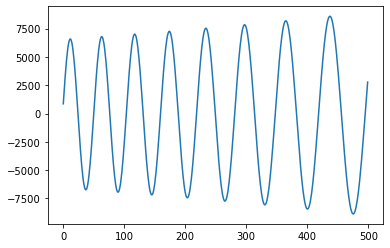

In [39]:
df.x.plot()

<AxesSubplot:>

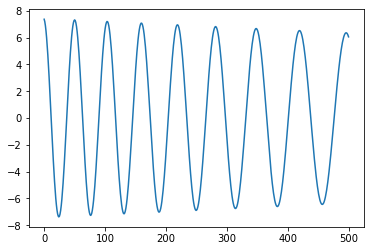

In [40]:
dfV.vv_x.plot()

OBS: as expected, the R increases while the V decreases as we are moving away from Earth attractor. 

## 2. Cowell's Formulation: 3rd body perturbation

In [41]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris

from poliastro.twobody.propagation import propagate, cowell
from poliastro.ephem import build_ephem_interpolant
from poliastro.core.elements import rv2coe

from poliastro.constants import rho0_earth, H0_earth
from poliastro.core.perturbations import atmospheric_drag_exponential, third_body, J2_perturbation
from poliastro.bodies import Earth, Moon
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter3D

import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [42]:
toll=1e-14

In [43]:
# database keeping positions of bodies in Solar system over time
solar_system_ephemeris.set("de432s")

epoch = Time(
    2454283.0, format="jd", scale="tdb"
)  # setting the exact event date is important

# create interpolant of 3rd body coordinates (calling in on every iteration will be just too slow)
body_r = build_ephem_interpolant(
    Moon, 28 * u.day, (epoch.value * u.day, epoch.value * u.day + 60 * u.day), rtol=1e-2
)

# GEO satellite
initial = Orbit.from_classical(
    Earth,
    42164.0 * u.km,
    0.0001 * u.one,
    1 * u.deg,
    0.0 * u.deg,
    0.0 * u.deg,
    0.0 * u.rad,
    epoch=epoch,
)

tofs = TimeDelta(np.linspace(0, 60 * u.day, num=1000))

# multiply Moon gravity by 400 so that effect is visible :)
rr = propagate(
    initial,
    tofs,
    method=cowell,
    rtol = toll, # do high tol of e-14
    ad=third_body,
    k_third=400 * Moon.k.to(u.km ** 3 / u.s ** 2).value,
    perturbation_body=body_r,
)

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\scipy\integrate\_ivp\common.py:46: UserWarning:

`rtol` is too low, setting to 2.220446049250313e-14



In [46]:
frame = OrbitPlotter3D()

frame.set_attractor(Earth)
frame.plot_trajectory(rr, label="orbit influenced by Moon")

In [32]:
rr

<CartesianRepresentation (x, y, z) in km
    [( 42159.7836    ,      0.        ,  0.00000000e+00),
     ( 39159.54548895,  15563.91619218,  2.66913396e+02),
     ( 30572.24010139,  28909.06557648,  4.96928457e+02),
     ( 17596.05898471,  38144.72480105,  6.71355898e+02),
     (  2068.44320857,  41949.72291265,  7.75646911e+02),
     (-13789.17316078,  39792.93071944,  8.01785884e+02),
     (-27722.57955222,  32035.51248517,  7.50107892e+02),
     (-37816.0519804 ,  19856.05394194,  6.29293672e+02),
     (-42772.77824042,   5013.72987734,  4.54270920e+02),
     (-42038.62134069, -10458.51933794,  2.42981838e+02),
     (-35789.37117481, -24531.87182289,  1.34484517e+01),
     (-24851.02158119, -35389.87722209, -2.17872772e+02),
     (-10607.44657045, -41589.37897715, -4.36184220e+02),
     (  5103.30839897, -42218.44552097, -6.27206139e+02),
     ( 20152.7507137 , -37064.82650702, -7.75642125e+02),
     ( 32396.7360913 , -26740.32277353, -8.64625551e+02),
     ( 40038.73455927, -12660.2

In [33]:
dictionary = {'x': rr.x, 'y': rr.y, 'z': rr.z,}
df2 = pd.DataFrame(data=dictionary)
df2

,x,y,z
0,42159.783600,0.000000,0.000000
1,39159.545489,15563.916192,266.913396
2,30572.240101,28909.065576,496.928457
3,17596.058985,38144.724801,671.355898
4,2068.443209,41949.722913,775.646911
...,...,...,...
995,38234.560983,21122.626943,-7729.980003
996,31594.564686,31056.038869,1622.694286
997,21172.777063,37155.711937,10779.298456
998,8179.033302,38600.411058,18585.398385


In [34]:
df2.to_csv('3rdBodyPerturbationPoliastro_HIGHTOL.csv', index=False) 

### For velocities:

In [35]:
rr,vv = cowell(k=Earth.k,
    r=initial.r,
    v=initial.v,
    tofs = TimeDelta(np.linspace(0, 60 * u.day, num=1000)),
    rtol=toll, # decrease for more accuracy (later 10e-8)
    ad=third_body,
    k_third=400 * Moon.k.to(u.km ** 3 / u.s ** 2).value,
    perturbation_body=body_r,
)

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\scipy\integrate\_ivp\common.py:46: UserWarning:

`rtol` is too low, setting to 2.220446049250313e-14



In [36]:
rr

<Quantity [[42159.7836    ,     0.        ,     0.        ],
           [39159.54548895, 15563.91619218,   266.91339627],
           [30572.24010139, 28909.06557648,   496.9284571 ],
           ...,
           [21172.7770633 , 37155.71193712, 10779.29845604],
           [ 8179.03330231, 38600.41105778, 18585.3983848 ],
           [-5831.4597893 , 35054.73186374, 23983.49822264]] km>

In [37]:
vv

<Quantity [[ 0.        ,  3.07450543,  0.05366569],
           [-1.14298398,  2.85284756,  0.04852759],
           [-2.12775647,  2.22898577,  0.03951803],
           ...,
           [-2.30108918,  0.74597526,  1.67054477],
           [-2.65671028, -0.20019809,  1.30377624],
           [-2.68450362, -1.15919324,  0.74876384]] km / s>

In [38]:
vv_x=vv[:,0]
vv_y=vv[:,1]
vv_z=vv[:,2]

In [39]:
dictionaryV2 = {'vv_x': vv_x, 'vv_y': vv_y, 'vv_z': vv_z}
dfV2 = pd.DataFrame(data=dictionaryV2)
dfV2

,vv_x,vv_y,vv_z
0,0.000000,3.074505,0.053666
1,-1.142984,2.852848,0.048528
2,-2.127756,2.228986,0.039518
3,-2.813645,1.287414,0.027234
4,-3.098444,0.161674,0.012698
...,...,...,...
995,-0.857195,2.210305,1.746021
996,-1.676526,1.578339,1.821188
997,-2.301089,0.745975,1.670545
998,-2.656710,-0.200198,1.303776


In [40]:
dfV2.to_csv('3rdBodyPerturbationPoliastro_vv_HIGHTOL.csv', index=False) 

<AxesSubplot:>

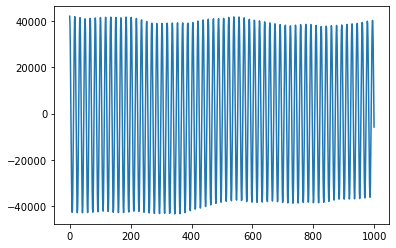

In [41]:
df2.x.plot()

<AxesSubplot:>

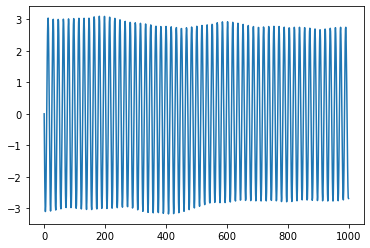

In [42]:
dfV2.vv_x.plot()